# Data cleaning

## Setup

In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import rootpath
import re
import qgrid
import glob

# Set root path for project
path = rootpath.detect()

# Read in data
# Use list comprehension to read in all files
# Cleansers
## Oily skin
df_cleanser_oily = pd.concat([pd.read_csv(file, index_col=0) for file in glob.glob(f"{path}/data/cleansers_face-wash_oilyskin_pg*.csv")], ignore_index=True)
## Dry skin
df_cleanser_dry = pd.concat([pd.read_csv(file, index_col=0) for file in glob.glob(f"{path}/data/cleansers_face-wash_dryskin_pg*.csv")], ignore_index=True)
## Normal skin
df_cleanser_normal = pd.concat([pd.read_csv(file, index_col=0) for file in glob.glob(f"{path}/data/cleansers_face-wash_normalskin_pg*.csv")], ignore_index=True)

# Toners
df_toner_normal = pd.concat([pd.read_csv(file, index_col=0) for file in glob.glob(f"{path}/data/cleansers_toner_normalskin_pg1.csv")], ignore_index=True)
df_toner_dry = pd.concat([pd.read_csv(file, index_col=0) for file in glob.glob(f"{path}/data/cleansers_toner_dryskin_pg1.csv")], ignore_index=True)
df_toner_oily = pd.concat([pd.read_csv(file, index_col=0) for file in glob.glob(f"{path}/data/cleansers_toner_oilyskin_pg1.csv")], ignore_index=True)

# Treatments and serums
df_serum_oily = pd.concat([pd.read_csv(file, index_col=0) for file in glob.glob(f"{path}/data/treatments and serums_face serum_oilyskin.csv")], ignore_index=True)
df_serum_dry = pd.concat([pd.read_csv(file, index_col=0) for file in glob.glob(f"{path}/data/treatments and serums_face serum_dryskin.csv")], ignore_index=True)

# Moisturizers
df_moist_dry = pd.concat([pd.read_csv(file, index_col=0) for file in glob.glob(f"{path}/data/moisturizer_face moisturizer_dryskin_pg*.csv")], ignore_index=True)
df_moist_oily = pd.concat([pd.read_csv(file, index_col=0) for file in glob.glob(f"{path}/data/moisturizer_face moisturizer_oilyskin_pg*.csv")], ignore_index=True)
df_moist_normal = pd.concat([pd.read_csv(file, index_col=0) for file in glob.glob(f"{path}/data/moisturizer_face moisturizer_normalskin_pg*.csv")], ignore_index=True)

# Generics
df_generics = pd.concat([pd.read_csv(file, index_col=0) for file in glob.glob(f"{path}/data/generics.csv")], ignore_index=True)

# Hand labels
df_hand = pd.concat([pd.read_csv(file, index_col=0) for file in glob.glob(f"{path}/data/handlabels.csv")], ignore_index=True)


## Examine data

In [2]:
# Merge data into one df
# - pd concat does a copy
df_raw = pd.concat([df_cleanser_oily,df_cleanser_dry,df_cleanser_normal,
                          df_toner_normal, df_toner_dry, df_toner_oily,
                         df_serum_oily,df_serum_dry, df_moist_dry,
                          df_moist_normal, df_moist_dry, df_generics,df_hand], axis=0)

In [ ]:
df_raw.shape

In [784]:
df_raw.head()

,use_category,use_subcategory,skintype,brand,product,size,price,details,ingredients,ratings,perc_respondrec,total_reviews,link,page
0,cleanser,face wash,oily,Philosophy,The Microdelivery Exfoliating Facial Wash,8.0 oz,Price\n$29.00,Daily exfoliation is vital to healthy-looking ...,"Aqua/Water/Eau, Solum Diatomeae/Diatomaceous E...",4.5,91%,812 Reviews,https://www.ulta.com/microdelivery-exfoliating...,1.0
1,cleanser,face wash,oily,Murad,AHA/BHA Exfoliating Cleanser,Size 6.75 oz|,Price\n$40.00,Featuring limited-edition Hydration packaging ...,"Water (Aqua), Sodium Laureth Sulfate, Cocamido...",4.6,93%,267 Reviews,https://www.ulta.com/ahabha-exfoliating-cleans...,1.0
2,cleanser,face wash,oily,CeraVe,Hydrating Facial Cleanser,8.0 oz,Price\n$13.49,"Developed with dermatologists, the CeraVe Hydr...","Purified Water, Glycerin, Behentrimonium Metho...",4.2,85%,700 Reviews,https://www.ulta.com/hydrating-facial-cleanser...,1.0
3,cleanser,face wash,oily,Peter Thomas Roth,Anti-Aging Cleansing Gel,Size 8.5 oz|,Price\n$39.00,"Oil-free, anti-wrinkle technology helps to cla...","Water/Aqua/Eau, Sodium Laureth Sulfate, Cocami...",4.5,91%,330 Reviews,https://www.ulta.com/anti-aging-cleansing-gel?...,1.0
4,cleanser,face wash,oily,Murad,Essential-C Cleanser,6.75 oz,Price\n$40.00,Murad Essential-C Cleanser is a patented antio...,"Water (Aqua), Cocamidopropyl Betaine, Disodium...",4.6,94%,272 Reviews,https://www.ulta.com/essential-c-cleanser?prod...,1.0


In [607]:
df_generics

,use_subcategory,skintype,brand,product,size,price,details,ingredients,ratings,perc_respondrec,total_reviews,link,page
0,face moisturizer,oily,Walgreens,Night facial moisturizing lotion,3,11.99,NaN,"Purified Water, Cetearyl Alcohol, Glycerin, Ca...",2.5,NaN,4,https://www.walgreens.com/store/c/walgreens-ni...,NaN
1,face moisturizer,normal,Walgreens,Night facial moisturizing lotion,3,11.99,NaN,"Purified Water, Cetearyl Alcohol, Glycerin, Ca...",2.5,NaN,4,https://www.walgreens.com/store/c/walgreens-ni...,NaN
2,face wash,normal,Walgreens,Gentle Skin Cleanser,16,8.79,NaN,"Water, Cetyl Alcohol, Propylene Glycol, Sodium...",4.1,NaN,14,https://www.walgreens.com/store/c/walgreens-ge...,NaN
3,face wash,dry,Walgreens,Gentle Skin Cleanser,16,8.79,NaN,"Water, Cetyl Alcohol, Propylene Glycol, Sodium...",4.1,NaN,14,https://www.walgreens.com/store/c/walgreens-ge...,NaN


In [1575]:
qgrid.show_grid(df_raw, grid_options={'forceFitColumns': False, 'defaultColumnWidth': 100})

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

In [785]:
df_raw.describe()

,ratings,page
count,2262.00000,2437.000000
mean,4.37038,1.738613
std,0.40273,0.903491
min,1.00000,1.000000
25%,4.20000,1.000000
50%,4.40000,1.000000
75%,4.60000,2.000000
max,5.00000,4.000000


In [786]:
df_raw['use_subcategory'].unique()

array(['face wash', 'toner', 'face serum', 'face moisturizer',
       'toothpaste'], dtype=object)

In [787]:
df_raw.dtypes

use_category        object
use_subcategory     object
skintype            object
brand               object
product             object
size                object
price               object
details             object
ingredients         object
ratings            float64
perc_respondrec     object
total_reviews       object
link                object
page               float64
dtype: object

## Data cleaning

### Size

In [1035]:
# Check for input errors
pd.options.display.max_rows = 4000 # 2447 rows
#df_raw['size'].unique

In [3]:
# Drop size rows with NaN
df_raw.dropna(subset = ['size'], inplace=True)
# Check
#df_raw['size'].isnull().sum()

In [4]:
# Drop rows without size information in oz
#  Ct is informative but no way to convert to oz so remove
#  NaN
df_raw=df_raw[~df_raw['size'].str.contains('ounce|ct|Original|Rose Petal|Hydrating Clearing Jelly+|Hydrating Jelly|Imperfections|Calm',
                                           na=False)]

In [5]:
# Replace cells with |Item to blank since these also contain size information
# - Use fillna to replace NaN strings back to orginal values
df_raw['size'] = df_raw['size'].str.replace('(\|Item \d{7})','').fillna(df_raw['size'])

In [6]:
# Remove rows that contain item in them
df_raw=df_raw[~df_raw['size'].str.contains('Item', na=False)]

In [7]:
# Replace 'size' and 'oz|' with blanks and convert size to float
df_raw['size'] = df_raw['size'].str.replace('Size | oz| oz\||\|','').fillna(df_raw['size']).astype('float64')

In [8]:
# Remove rows that contain Travel Size items in them
df_raw=df_raw[~df_raw['product'].str.contains('Travel Size', na=False)]

### Price

In [9]:
# Remove text and convert price to numeric 
df_raw['price']=df_raw['price'].str.replace('''Price\\n\$|Sale Price\\n\$\d*\.\d*\\nOriginal Price\\n\$|
                                      Price\\n\$|\\nMarket Value\\n\(\$39 value\)|
                                      |\\nMarket Value\n\(\$58 value\)|
                                      |\\nMarket Value\\n\(\$54 value\)''',
                                   '').fillna(df_raw['price']).astype('float64')

### Reviews

In [10]:
# Drop total_reviews rows with NaN
df_raw.dropna(subset = ['total_reviews'], inplace=True)

In [11]:
# Remove review text and convert to integer
df_raw['total_reviews'] = df_raw['total_reviews'].str.replace(' Reviews| Review','') \
                                                 .fillna(df_raw['total_reviews'])
df_raw['total_reviews'] = pd.to_numeric(df_raw['total_reviews'],errors='coerce',downcast='signed') \
                                      .fillna(df_raw['total_reviews']) \
                                      .astype(int)

### Ingredients

In [12]:
# Remove rows with no ingredient information, 11 rows
df_raw.dropna(subset=['ingredients'], inplace = True)

In [1576]:
df_raw[df_raw['brand']=="SUNDAY RILEY"]

,use_category,use_subcategory,skintype,brand,product,size,price,details,ingredients,ratings,perc_respondrec,total_reviews,link,page
87,cleanser,face wash,normal,SUNDAY RILEY,Ceramic Slip Cleanser,5.00,35.0,Sunday Riley Ceramic Slip has a blend of four ...,"Water/ Eau/ Aqua, Octyldodecanol, Propanediol,...",3.2,NaN,33,https://www.ulta.com/ceramic-slip-cleanser?pro...,2.0
50,cleanser,toner,dry,SUNDAY RILEY,Pink Drink Firming Resurfacing Essence,6.75,48.0,Sunday Riley's Pink Drink Firming Resurfacing ...,"Water/Eau/Aqua, Yeast Ferment (Pink Yeast) Ext...",5.0,NaN,2,https://www.ulta.com/pink-drink-firming-resurf...,1.0
51,cleanser,toner,oily,SUNDAY RILEY,Pink Drink Firming Resurfacing Essence,1.70,48.0,Sunday Riley's Pink Drink Firming Resurfacing ...,"Water/Eau/Aqua, Yeast Ferment (Pink Yeast) Ext...",5.0,NaN,2,https://www.ulta.com/pink-drink-firming-resurf...,1.0
0,treatments and serums,face serum,Unknown,SUNDAY RILEY,Good Genes All-In-One Lactic Acid Treatment,1.00,85.0,"Multi-tasking, targeted lactic acid treatment ...","Aqua, Opuntia Tuna Fruit Extract, Cypripedium ...",4.1,64,104,https://www.ulta.com/good-genes-all-in-one-lac...,NaN
1,treatments and serums,face serum,Unknown,SUNDAY RILEY,A+ High-Dose Retinoid Serum,1.00,85.0,Sunday Riley A+ High-Dose Retinoid Serum combi...,"Water/Eau/Aqua, Dimethyl Isosorbide, Propanedi...",4.4,74,30,https://www.ulta.com/a-high-dose-retinoid-seru...,NaN
2,treatments and serums,face serum,Unknown,SUNDAY RILEY,C.E.O. 15% Vitamin C Brightening Serum,1.00,85.0,Sunday Riley C.E.O. Vitamin C Brightening Seru...,"Water/ Eau/ Aqua, Tetrahexyldecyl Ascorbate, S...",3.8,NaN,43,https://www.ulta.com/ceo-15-vitamin-c-brighten...,NaN


In [1040]:
df_raw['ingredients'].unique()

array(['Aqua/Water/Eau, Solum Diatomeae/Diatomaceous Earth/Terre De Diatomees, Sodium Cocoyl Apple Amino Acids, Glycerin,Acrylates/Steareth-20 Methacrylate Copolymer, Acrylates Copolymer, Decyl Glucoside, Disodium Cocoamphodiacetate, Phenoxyethanol, Lauryl Glucoside, Lithium Magnesium Sodium Silicate, Polysorbate 20, Hexylene Glycol, Sodium Hydroxide, Citrus Aurantium Dulcis (Orange) Peel Extract, Limonene, Decylene Glycol, Ethylhexylglycerin, Panthenol, Tetrasodium Edta, 1,2-Hexanediol, Ascorbyl Glucoside, Borago Officinalis Seed Oil, Tocopherol, Helianthus Annuus (Sunflower) Seed Oil, Tocotrienols, Triolein, Trilinolein, Magnesium Nitrate, Methylisothiazolinone, Methylchloroisothiazolinone, Magnesium Chloride.',
       'Water (Aqua), Sodium Laureth Sulfate, Cocamidopropyl Betaine, Jojoba Esters, Acrylates Copolymer, Glycol Stearate, Butylene Glycol, Sodium PCA, Dipotassium Glycyrrhizate, Sodium Ascorbyl Phosphate, Glycolic Acid, Lactic Acid, Salicylic Acid, Polyquaternium-4, Sodium H

In [1602]:
df_raw.shape

(1892, 14)

In [1083]:
#len('However, because ingredients are subject to change') # 50
#len('Citrus Aurantium Dulcis (Orange) Fruit Water') # 44
#len('Aloe Barbadensis/Aloe Barbadensis Leaf Juice') # 44
#len('Rosmarinus Officinalis (Rosemary) Leaf Extract')

46

In [13]:
df_temp = df_raw.copy()

In [14]:
# Change string of ingredients into a list containing a string for each ingredient, split by the following characters
# split by comma, \n, . space, .\n
df_temp['ingredients'] = df_temp['ingredients'].str.split(',|\\n|\. |.\\n') 

In [15]:
# strip whitespace from around each ingredient and change to lowercase
df_temp['ingredients'] = [[ingredient.strip().lower() for ingredient in product] for product in df_temp['ingredients']]
# Expand ingredient lists from lists to rows in df
df_temp = df_temp.explode('ingredients')

In [16]:
# Remove ingredient rows that have > 50 characters
# - Removes about 2000 rows; len(test) = 58795, previous length = 60434
df_temp = df_temp.loc[df_temp['ingredients'].str.len() <= 50]

In [17]:
# Replace periods at the end or other words  with blanks
df_temp['ingredients']=df_temp['ingredients'].str.replace('''\.$|\*+|other ingredients\: |\(sunscreen agent|
                                                          |ultraviolet light absorber\)|eau\)|oils & sugar\)|
                                                          | \(veg|\(solvent\/diluent\)|inactive\: ''','')

In [18]:
# Correct 1,2 hexanediol
df_temp['ingredients']=df_temp['ingredients'].str.replace('2-hexanediol','1,2-hexanediol')

In [19]:
# Remove rows that contain the following words or characters
df_temp = df_temp[~df_temp['ingredients'].str.contains('because|however|please|we|because|this|error\-free|^1|\*essential oi|^$|ext')] 

In [20]:
# Replace all rows that contain string water with water, get rid of alternative spellings
df_temp['ingredients'] = np.where(df_temp['ingredients'].str.contains('water'), 'water', df_temp['ingredients'])  
# Same for fragrance
df_temp['ingredients'] = np.where(df_temp['ingredients'].str.contains('fragrance|parfum'), 'fragrance', df_temp['ingredients'])  

In [21]:
# If active ingredient, paste to other column for text parsing
# df_temp['test'] = np.where(df_temp['ingredients'].str.contains('active')==True,
#                            df_temp['ingredients'],'no_actives')

In [22]:
# If active ingredient, paste to other column for text parsing
# - Make two columns, one for ingredient name, the other for the value
df_temp['active'] = np.where(df_temp['ingredients'].str.contains('active')==True,
                           df_temp['ingredients'],'no_actives')
df_temp['active_value'] = np.where(df_temp['ingredients'].str.contains('active')==True,
                           df_temp['ingredients'],'no_actives')

In [23]:
## Active ingredients
# Remove active ingredient with blanks
df_temp['active']=df_temp['active'].str.replace('.*active.*: |\d*\.*\d*%|\(\d*\.*\d*%\)| \d+\.\d+| \d+| +\(sunscreen\)','').str.strip() #|\d*.*\d*%

# Remove regex error
df_temp['active']=df_temp['active'].str.replace('solar vitis\) and bioactive berry complex','no_actives').str.strip()

# Replace avebenzone
df_temp['active']=df_temp['active'].str.replace('avobenzonem','avobenzone').str.strip()

# Separate clumped actives
df_temp['active']=df_temp['active'].str.replace('avobenzoneoctinoxateoctisalate','no_actives').str.strip() # fix later: avobenzone octinoxate octisalate

In [24]:
## Active ingredient values
# Replace % symbol and remove whitespace
df_temp['active_value']=df_temp['active_value'].str.replace('.*active.*: .* |\(|%\)|\s*%','').str.strip()

# Get rid of non-values
df_temp['active_value']=df_temp['active_value'].str.replace('sunscreen\)|solar vitis\) and bioactive 8 berry complex|acid|no_actives','0').str.strip()

# Correct avobenzone
df_temp['active_value']=df_temp['active_value'].str.replace('active: avobenzonem3.0','3').str.strip()

# Convert to numeric, divide by 100 for proportion, and change NAs to zeros
df_temp['active_value'] = pd.to_numeric(df_temp['active_value'],errors='coerce',downcast='signed').fillna(0)/100

In [1986]:
# Label vitamin A
df_temp['ingredients']=df_temp['ingredients'].str.replace('retinyl palmitate \(vitamin a\)|retinyl palmitate \(vitamin a/vitamine a\)','retinyl palmitate').str.strip()

df_temp['vitamin a'] = np.where(df_temp['ingredients'].str.contains('''retinyl palmitate|retinol|bakuchiol|
                                                                        retinyl retinoate|
                                                                        vitamin a \(hpr:hydroxypinacolone retinoate\)'''),
                                1,0)

,use_category,use_subcategory,skintype,brand,product,size,price,details,ingredients,ratings,perc_respondrec,total_reviews,link,page,active,active_value,ingred_value,skintype_value,producttype_value
4,cleanser,face wash,oily,Murad,Essential-C Cleanser,6.750,40.00,Murad Essential-C Cleanser is a patented antio...,retinyl palmitate,4.6,94%,272,https://www.ulta.com/essential-c-cleanser?prod...,1.0,no_actives,0.0,1,1,1
48,cleanser,face wash,oily,Jack Black,All-Over Wash,33.000,50.00,This is the ultimate guy product from Jack Bla...,retinyl palmitate,4.8,99%,279,https://www.ulta.com/all-over-wash?productId=x...,1.0,no_actives,0.0,1,1,1
66,cleanser,face wash,oily,Juice Beauty,Green Apple Brightening Gel Cleanser,4.500,28.00,Vegan & Cruelty-Free. Formulated with an organ...,retinyl palmitate,4.4,84%,198,https://www.ulta.com/green-apple-brightening-g...,1.0,no_actives,0.0,1,1,1
68,cleanser,face wash,oily,Juice Beauty,Blemish Clearing Cleanser,6.750,25.00,Vegan & Cruelty-Free. Formulated with an organ...,retinyl palmitate,4.1,83%,281,https://www.ulta.com/blemish-clearing-cleanser...,1.0,no_actives,0.0,1,1,1
69,cleanser,face wash,oily,Dermadoctor,"Kakadu C Brightening Daily Cleanser, Toner & M...",7.100,38.00,Pamper the skin with this daily rejuvenating c...,retinyl palmitate,4.4,90%,196,https://www.ulta.com/kakadu-c-brightening-dail...,1.0,no_actives,0.0,1,1,1
77,cleanser,face wash,oily,Derma E,Skin De-Stress Calming CBD Cleanser,6.000,14.95,Gently lift away impurities while soothing sen...,retinyl palmitate,4.7,95%,188,https://www.ulta.com/skin-de-stress-calming-cb...,1.0,no_actives,0.0,1,1,1
93,cleanser,face wash,oily,Derma E,Hydrating Cleanser,6.000,15.50,Hydrating Cleanser by DERMA E deeply moisturiz...,retinyl palmitate,4.7,81%,164,https://www.ulta.com/hydrating-cleanser?produc...,1.0,no_actives,0.0,1,1,1
126,cleanser,face wash,oily,Pixi,Retinol Jasmine Cleanser,4.500,18.00,The Pixi Retinol Jasmine Cleanser is a creamy ...,retinyl palmitate,4.0,NaN,2,https://www.ulta.com/retinol-jasmine-cleanser?...,3.0,no_actives,0.0,1,1,1
4,cleanser,face wash,dry,Murad,Essential-C Cleanser,6.750,40.00,Murad Essential-C Cleanser is a patented antio...,retinyl palmitate,4.6,NaN,272,https://www.ulta.com/essential-c-cleanser?prod...,1.0,no_actives,0.0,1,1,1
41,cleanser,face wash,dry,Jack Black,All-Over Wash,33.000,50.00,This is the ultimate guy product from Jack Bla...,retinyl palmitate,4.8,NaN,279,https://www.ulta.com/all-over-wash?productId=x...,1.0,no_actives,0.0,1,1,1


In [1908]:
# Create column for presence of ingredient in a product (excluding absences and does not account for all possible ingredients)
df_temp['ingred_value'] = 1
df_temp['skintype_value'] = 1 
df_temp['producttype_value'] = 1 

In [1919]:
## Remove common or non-important ingredient rows and ingredient entry errors
# Remove rows that contain the following words or characters
df_test = df_temp[~df_temp['ingredients'].str.contains('''water|phenoxyethanol|fragrance|disodium edta|citric acid|
                                                       |xanthan gum|sodium hydroxide|potassium sorbate|sodium benzoate|
                                                       |linalool|carbomer|limonene|sodium chloride|citronellol|
                                                       |geraniol|methylparaben|potassium hydroxide|bht|
                                                       |tetrasodium edta|propylparaben|benzoic acid|trisodium ethylenediamine disuccinate|
                                                       |ethylparaben|aqua|\+ plant derived / origine vtale|
                                                       |methylisothiazolinone|opens in a new windo|ulta\.com/coupons for details|
                                                       |see|eugenol|essential oi|glycerin|butylene glycol|caprylyl glycol|
                                                       |ci|ptfe|xantham gum|> denotes organically soure|ethylhexylglycerin|
                                                       |red|green|yellow|blue|organic sucrose \(brown sugar|dimethicone|
                                                       |contains less than 0\.3% thc|f\.i\.l\.# b172461/1|sodium hyaluronate|
                                                       |denotes certified organic ingredien|de lagriculture biologique|
                                                       |d227948/1|95% naturally derived naturellement|etc|
                                                       |soothing complex: \[sodium hyaluronate|\+plant derived/origine végétale|
                                                       |lifting phase|phenoxyethnaol|denotes organically sourced|\++|
                                                       |firming phase|with minerals|98% organic of total|\[v2968a|hotheyver|
                                                       |\[v2899a|fd \& c color| denotes organically sourced|5%|\[v2922a|
                                                       |\[v3147a\]|flavor|\(solvent\)|naturally-derived|organi|refer to the product packaging|
                                                       |depending on the location and timing of purchase|napiers moisture formul|
                                                       |xanthangum|xanathan gum|xanthum gum|the most bioavailable form of vitamin c|
                                                       |when skin is overwhelmed due to stress|for the 1st time from vichy|
                                                       |the skin¿s defenses can become overworked|violet|laureth¿4|phenoxyrthanol|
                                                       |67%|lait de chèvre\)|\[v2898a|\[v3059a\]|\[v2968a|the carefully selected|
                                                       |xenthan gum|variations in color|95% naturally derived/dérivé naturellement|
                                                       |de l¿agriculture biologique|# b201629/1''')]
# replace
#'glycerin+|'

In [1918]:
ingred_cts = df_test['ingredients'].value_counts()
ingred_cts

tocopherol                                            542
tocopheryl acetate                                    423
propanediol                                           385
cetearyl alcohol                                      384
glyceryl stearate                                     380
caprylic/capric triglyceride                          367
polysorbate 20                                        336
propylene glycol                                      280
chlorphenesin                                         272
panthenol                                             263
cetyl alcohol                                         259
squalane                                              257
allantoin                                             242
peg-100 stearate                                      235
pentylene glycol                                      235
acrylates/c10-30 alkyl acrylate crosspolymer          228
silica                                                207
hexylene glyco

In [1789]:
ingred_cts = df2['ingredients'].value_counts()
ingred_cts

water                                                 1828
glycerin                                              1446
phenoxyethanol                                        1172
butylene glycol                                        851
fragrance                                              781
disodium edta                                          738
citric acid                                            675
xanthan gum                                            672
caprylyl glycol                                        665
ethylhexylglycerin                                     629
sodium hyaluronate                                     628
dimethicone                                            622
tocopherol                                             542
sodium hydroxide                                       514
potassium sorbate                                      486
sodium benzoate                                        450
tocopheryl acetate                                     4

In [1947]:
# Print barplot of counts of each ingredient
import matplotlib.pyplot as plt
#plt.hist(ingred_cts)
#plt.show()

df_test = df_temp['ingredients'].copy().unique()
df_test2 = df_temp['ingredients'].value_counts()
#df_test.columns
#df_test.sort_values('ingred_cts', ascending=False).plot.bar()

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [ ]:
# Remove rows with 1 by itself, watch out for removing ceramide 1!
# Replace 2-hexanediol w/ 1,2-hexanediol
# Counts of particular types of ingredients, e.g. extracts, acids, parabens
# heuristic for AHA: glycolic acid, BHA: salicylic acid; malic acid?salicylic acid (0.5%); active: salicylic acid (1.0%)
# What about these? red 40 (ci 16035), yellow 5 (ci 19140)., fd&amp;c yellow no, 5 (ci 19140).
# Vitamin C: ascorbyl palmitate, ascorbic acid
# Vitamin A: retinyl palmitate
# iron oxides (ci 77492).
# active ingredient: salicylic acid (1.51%) : if else, paste to other columns
# other ingredients: water (aqua) : str replace other ingredients
# alcohol denat : str replace with alcohol?

In [ ]:
# Code from Jane
# import string

# gamename.translate(str.maketrans('','',string.punctuation))

## Pivot data and merge

In [1948]:
# Move cleaning data 
df2 = df_temp.copy() 

In [1603]:
df2.shape

(50109, 23)

In [1786]:
df2['ingredients'].unique()[:100]

array(['water', 'sodium cocoyl apple amino acids', 'glycerin',
       'acrylates/steareth-20 methacrylate copolymer',
       'acrylates copolymer', 'decyl glucoside',
       'disodium cocoamphodiacetate', 'phenoxyethanol',
       'lauryl glucoside', 'lithium magnesium sodium silicate',
       'polysorbate 20', 'hexylene glycol', 'sodium hydroxide',
       'limonene', 'decylene glycol', 'ethylhexylglycerin', 'panthenol',
       'tetrasodium edta', 'ascorbyl glucoside',
       'borago officinalis seed oil', 'tocopherol', 'tocotrienols',
       'triolein', 'trilinolein', 'magnesium nitrate',
       'methylisothiazolinone', 'methylchloroisothiazolinone',
       'magnesium chloride', 'sodium laureth sulfate',
       'cocamidopropyl betaine', 'jojoba esters', 'glycol stearate',
       'butylene glycol', 'sodium pca', 'dipotassium glycyrrhizate',
       'sodium ascorbyl phosphate', 'glycolic acid', 'lactic acid',
       'salicylic acid', 'polyquaternium-4', 'sodium chloride',
       'citric a

### Ordinal encoding for ingredients

In [1949]:
# Add sequence for each ingredient in product
df2['ingred_order'] = df2.groupby('product')['ingred_value'].rank(method="first", ascending=True)

# Get max value of sequence and store in separate df
df2temp = df2.groupby('product')['ingred_order'].max().reset_index()

# Plus 1 so that last ingredient is 1 when take difference of max and ingredient order
# Otherwise zero will indicate that last ingredient isn't present
df2temp['ingred_order'] = df2temp['ingred_order']+1
df2temp=df2temp.rename(columns={"ingred_order":"ingred_ordinal_max"})

# Merge with original DF
df2=pd.merge(df2,df2temp,on='product')

# Take difference of ordinal max from ingredient order to get ordinal values for ingredients
df2['ingred_ordinal'] = df2["ingred_ordinal_max"] - df2["ingred_order"]

# Scale by the ordinal max so products with different numbers of ingredients are on the same scale
# minus 1 because added 1 before so last ingredient would not be zero
df2['ingred_ordinal_sc'] = df2['ingred_ordinal']/(df2["ingred_ordinal_max"]-1)

In [1950]:
#df2[df2['brand']=='SUNDAY RILEY']

In [1951]:
# Drop page
df2.drop(columns=['page'], inplace=True)

### Pivot ingredients long to wide

In [1952]:
df3 = df2.pivot_table(index=['product','skintype','skintype_value','use_subcategory','producttype_value','active',
                             'active_value'],
                    columns='ingredients',
                    values='ingred_ordinal_sc',
                     aggfunc='max',
                     fill_value=0)
# Put index values back as columns
df3.reset_index(inplace=True)

In [1498]:
df3.head()

ingredients,product,skintype,skintype_value,use_subcategory,producttype_value,active,active_value,aloe barbadensis (aloe vera) leaf juice,certified organic ingredien,cymbopogon schoenanthus (lemongrass) oil,...,zinc oxide 6.3%,zinc palmitoyl nonapeptide-14,zinc pca,zinc sulfate,zingiber officinale (ginger) oil,zingiber officinale (ginger) root,zingiber officinale (ginger) root oil,zingiber officinale root,~ ecocert,¿plant derived / origine végétale
0,''Buffet'',dry,1,face serum,1,no_actives,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,''Buffet'',oily,1,face serum,1,no_actives,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,''Buffet'' + Copper Peptides 1%,dry,1,face serum,1,no_actives,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,''Buffet'' + Copper Peptides 1%,oily,1,face serum,1,no_actives,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,+Retinol Vita C Power Serum Firming + Brighten...,dry,1,face serum,1,no_actives,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Pivot skintype long to wide

In [1953]:
# Pivot wider based on skintype
df4 = df3.pivot_table(index='product',
                    columns='skintype',
                    values='skintype_value',
                     aggfunc='max',
                     fill_value=0)

# Put index values back as columns
df4.reset_index(inplace=True)

In [1954]:
# merge df for one hot encoding for skintypes
df5=pd.merge(df3,df4,on='product')

# Get rid of skintype and skintype_value columns now that they're one hot encoded
df5.drop(columns=['skintype','skintype_value'], inplace=True)

### Pivot wider based on use_subcategory

In [1955]:
df4_1 = df3.pivot_table(index='product',
                    columns='use_subcategory',
                    values='producttype_value',
                     aggfunc='max',
                     fill_value=0)

# Put index values back as columns
df4_1.reset_index(inplace=True)

In [1956]:
# merge df for one hot encoding for skintypes
df5=pd.merge(df5,df4_1,on='product')

# Get rid of skintype and skintype_value columns now that they're one hot encoded
df5.drop(columns=['use_subcategory','producttype_value'], inplace=True)
#df5.head()

### Pivot wider based on active

In [1957]:
# Increase weighting of the active value by adding a constant of 50 plus the active amount
df2['active_value'] = np.where(df2['active_value'] > 0,
                           df2['active_value']+100,df2['active_value'])

In [1740]:
df2['active_value'].describe()

count    50109.000000
mean         0.146791
std          2.706240
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         50.200000
Name: active_value, dtype: float64

In [1958]:
df4_2 = df2.pivot_table(index='product',
                    columns='active',
                    values='active_value',
                     aggfunc='max',
                     fill_value=0)

# Put index values back as columns
df4_2.reset_index(inplace=True)

In [1713]:
df2.head() 

,use_category,use_subcategory,skintype,brand,product,size,price,details,ingredients,ratings,...,link,active,active_value,ingred_value,skintype_value,producttype_value,ingred_order,ingred_ordinal_max,ingred_ordinal,ingred_ordinal_sc
0,cleanser,face wash,oily,Philosophy,The Microdelivery Exfoliating Facial Wash,8.0,29.0,Daily exfoliation is vital to healthy-looking ...,water,4.5,...,https://www.ulta.com/microdelivery-exfoliating...,no_actives,0.0,1,1,1,1.0,57.0,56.0,1.000000
1,cleanser,face wash,oily,Philosophy,The Microdelivery Exfoliating Facial Wash,8.0,29.0,Daily exfoliation is vital to healthy-looking ...,sodium cocoyl apple amino acids,4.5,...,https://www.ulta.com/microdelivery-exfoliating...,no_actives,0.0,1,1,1,2.0,57.0,55.0,0.982143
2,cleanser,face wash,oily,Philosophy,The Microdelivery Exfoliating Facial Wash,8.0,29.0,Daily exfoliation is vital to healthy-looking ...,glycerin,4.5,...,https://www.ulta.com/microdelivery-exfoliating...,no_actives,0.0,1,1,1,3.0,57.0,54.0,0.964286
3,cleanser,face wash,oily,Philosophy,The Microdelivery Exfoliating Facial Wash,8.0,29.0,Daily exfoliation is vital to healthy-looking ...,acrylates/steareth-20 methacrylate copolymer,4.5,...,https://www.ulta.com/microdelivery-exfoliating...,no_actives,0.0,1,1,1,4.0,57.0,53.0,0.946429
4,cleanser,face wash,oily,Philosophy,The Microdelivery Exfoliating Facial Wash,8.0,29.0,Daily exfoliation is vital to healthy-looking ...,acrylates copolymer,4.5,...,https://www.ulta.com/microdelivery-exfoliating...,no_actives,0.0,1,1,1,5.0,57.0,52.0,0.928571


In [1959]:
# merge df for one hot encoding for actives
df5=pd.merge(df5,df4_2,on='product')

In [1960]:
# Get rid of skintype and skintype_value columns now that they're one hot encoded
df5.drop(columns=['active','active_value'], inplace=True)
#df5.head()

In [1961]:
# Extract distinct rows since no longer need product duplicates
df5=df5.drop_duplicates(subset = ["product"])
#df5.shape

In [1711]:
df5.head()

,product,aloe barbadensis (aloe vera) leaf juice,certified organic ingredien,cymbopogon schoenanthus (lemongrass) oil,denotes certified organic ingredient,denotes organically sourced,essential oi,limonene,organic sucrose (brown sugar,plant derived,...,toothpaste,avobenzone,benzoyl peroxide,homosalate_y,no_actives,octinoxate,salicylic acid_y,sulfur_y,titanium dioxide_y,zinc oxide_y
0,''Buffet'',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,''Buffet'' + Copper Peptides 1%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,+Retinol Vita C Power Serum Firming + Brighten...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,+Retinol Vitamin C Moisturizer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1000 Roses Cleansing Foam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1962]:
# Add total ingredients column
tempdf = df2[['ingred_ordinal_max', 'product']]
tempdf = tempdf.rename(columns={'ingred_ordinal_max':'total_ingred'})
# Remove extra 1 added for ordinal encoding
tempdf['total_ingred']=tempdf['total_ingred']-1
# Remove duplicate rows
tempdf=tempdf.drop_duplicates(subset = ["product"])
#tempdf.head()
# Merge df
df6 = df5.merge(tempdf, how = 'left', on = 'product')
#df6.head()

In [1963]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df6[['total_ingred_sc']] = scaler.fit_transform(df6[['total_ingred']])
#df6.head()

In [1597]:
df6.head()

,product,aloe barbadensis (aloe vera) leaf juice,certified organic ingredien,cymbopogon schoenanthus (lemongrass) oil,denotes certified organic ingredient,denotes organically sourced,essential oi,limonene,organic sucrose (brown sugar,plant derived,...,benzoyl peroxide,homosalate_y,no_actives,octinoxate,salicylic acid_y,sulfur_y,titanium dioxide_y,zinc oxide_y,total_ingred,total_ingred_sc
0,''Buffet'',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.280802
1,''Buffet'' + Copper Peptides 1%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.0,0.269341
2,+Retinol Vita C Power Serum Firming + Brighten...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72.0,0.200573
3,+Retinol Vitamin C Moisturizer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123.0,0.346705
4,1000 Roses Cleansing Foam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.060172


## SVD

In [1512]:
#df6.columns[2950:]

Index(['vinyl dimethicone/methicone silsesquioxane',
       'vinylidene chloride copolymer', 'violet 2', 'violet 2 (ci 60730)',
       'violet 2)', 'vitamin a (hpr:hydroxypinacolone retinoate)',
       'vitamin b5 (panthenol)', 'vitamin c',
       'vitamin c (100% l-ascorbic acid)',
       'vitamin c (sodium ascorbyl phosphate)', 'vitamin c/ascorbic acid',
       'vitamin e (tocopherol)', 'vitamin e (tocopheryl)',
       'vitamin e (tocotrienol)', 'vitas vinifera (grape) seed oil',
       'vitis vinifera (grape seed oil)', 'vitis vinifera (grape) fruit',
       'vitis vinifera (grape) seed oil', 'vitis vinifera (grape) seed oil+',
       'vitis vinifera (grapeseed) oil',
       'vitis vinifera (organic white grape juice)',
       'vitis vinifera (white grape) juice', 'vitis viniferz (grape) seed oil',
       'volcanic ash', 'volcanic soil', 'vp/eicosene copolymer',
       'vp/va copolymer', 'water', 'wheat amino acids',
       'when skin is overwhelmed due to stress',
       'whey prot

In [1757]:
## Validation fit for product type

from sklearn.decomposition import TruncatedSVD
#from scipy.sparse import csr_matrix
import seaborn as sns

# Create feature ready df
features = df6.copy().drop(['total_ingred', 'all','face moisturizer','face serum','face wash',
                           'toner','toothpaste'],axis=1).set_index('product')


In [1704]:
df6.columns[-30:]

Index(['zinc palmitoyl nonapeptide-14', 'zinc pca', 'zinc sulfate',
       'zingiber officinale (ginger) oil', 'zingiber officinale (ginger) root',
       'zingiber officinale (ginger) root oil', 'zingiber officinale root',
       '~ ecocert', '¿plant derived / origine végétale', 'Unknown', 'all',
       'dry', 'normal', 'oily', 'face moisturizer', 'face serum', 'face wash',
       'toner', 'toothpaste', 'avobenzone', 'benzoyl peroxide', 'homosalate_y',
       'no_actives', 'octinoxate', 'salicylic acid_y', 'sulfur_y',
       'titanium dioxide_y', 'zinc oxide_y', 'total_ingred',
       'total_ingred_sc'],
      dtype='object')

In [1964]:
## FIT SVD FOR SPARSE DATA
# Load libraries

from sklearn.decomposition import TruncatedSVD
#from scipy.sparse import csr_matrix
import seaborn as sns

# Create feature ready df
#features = df6.copy().drop(['total_ingred'],axis=1).set_index('product')
# Try removing features that will wash out the important ingredients
features = df6.copy().drop(['total_ingred','total_ingred_sc','no_actives'],axis=1).set_index('product')

In [1971]:
features.shape

(853, 2194)

In [1978]:
# Create a TSVD
tsvd = TruncatedSVD(n_components=10)

# Conduct TSVD on sparse matrix
X_sparse_tsvd = tsvd.fit(features).transform(features)
df7 = pd.DataFrame(X_sparse_tsvd)

In [1979]:
# Sum of first three components' explained variance ratios
dat_plot = pd.DataFrame(tsvd.explained_variance_ratio_[0:400])
tsvd.explained_variance_ratio_[0:10].sum()

0.9862164084509208

In [441]:
# Eigenvalues
tsvd.explained_variance_

array([0.1837389 , 0.36298439, 0.33308637, 0.25325717, 0.21017713,
       0.18003669, 0.15449495, 0.13563904, 0.12890032, 0.12637338,
       0.11109831, 0.10867418, 0.09740543, 0.09671291, 0.09551439,
       0.09303635, 0.08918521, 0.08845115, 0.08529319, 0.08328756,
       0.08136854, 0.07814838, 0.07706576, 0.07507417, 0.07212604,
       0.07175233, 0.07055295, 0.0671992 , 0.06681318, 0.06556072,
       0.06150146, 0.06098436, 0.0601717 , 0.06001009, 0.05839092,
       0.05610916, 0.05579048, 0.0544885 , 0.05276866, 0.05188954,
       0.05089707, 0.04950202, 0.04856195, 0.04819334, 0.04785062,
       0.04656478, 0.04534316, 0.04478381, 0.04449258, 0.04376333,
       0.04280615, 0.04263771, 0.04141139, 0.04066093, 0.0397463 ,
       0.0394692 , 0.03861206, 0.0382935 , 0.03767547, 0.03658265,
       0.03606214, 0.03563213, 0.03526112, 0.03462202, 0.03392248,
       0.03371947, 0.03339821, 0.03280109, 0.03192367, 0.03169268,
       0.03138058, 0.03057876, 0.03052861, 0.02987992, 0.02928

In [ ]:
# Plot 
ax = sns.barplot(x="day", y="tsvd.explained_variance_ratio_[0:2]", data=dat_plot)

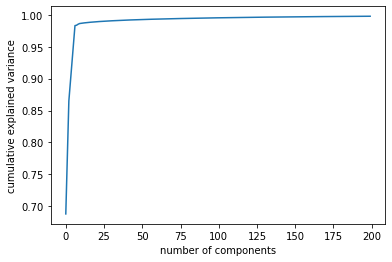

In [1968]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum(tsvd.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [452]:
df7.head()

,0,1,2,3,4,5,6,7,8,9,...,115,116,117,118,119,120,121,122,123,124
0,1.079488,0.166756,-0.664177,0.435997,-0.666657,-1.077805,0.834631,-0.382261,-1.179065,0.095714,...,0.385104,0.402839,0.257540,0.098062,0.021444,0.118731,0.110133,-0.109568,-0.105931,0.151978
1,1.843619,-0.852818,-0.414215,-0.034749,-0.127197,-0.682777,0.165807,0.186618,-0.032139,-0.188757,...,0.017583,-0.001201,-0.108024,0.006224,-0.046372,-0.039557,-0.049626,0.002531,-0.115787,0.014859
2,1.536162,0.045772,-0.837378,0.312137,0.141460,-0.153411,0.310379,-0.455851,-0.456844,-0.207281,...,-0.070388,-0.127883,0.061339,0.051660,0.015898,0.018430,0.045841,-0.009908,-0.032223,0.005806
3,1.756331,-0.617205,-0.139568,0.170658,0.078240,0.218845,-0.084785,0.263455,-0.160521,-0.386417,...,-0.038662,0.050597,0.097747,-0.005082,-0.104133,-0.016692,-0.010874,0.088196,-0.151884,0.011179
4,1.310773,-0.597265,0.141789,-0.623326,0.255439,-0.126778,0.205320,0.121826,0.034829,0.174755,...,0.023380,-0.071698,0.002032,0.027034,0.005684,0.039237,0.032055,-0.028730,-0.079167,0.065853


In [1980]:
# Add product info back into SVD df results
df7['product']=df6['product']
# Extract OG product info
product_details=df2[['product','brand','use_subcategory','active','price','size','ratings','total_reviews','link']].copy()
# Rename
product_details=product_details.rename(columns={'use_subcategory':'product_type'})
# price per oz
product_details['price_oz']=(product_details['price']/product_details['size']).round(2)
# Merge product deets with SVD results
df8 = product_details.merge(df7, how = 'left', on = 'product')
# drop duplicates
df8=df8.drop_duplicates(subset = ["product"])
#df8.head(n=5)

In [1981]:
df8.shape

(853, 20)

## Multidimensional Scaling (MDS)

In [1645]:
from sklearn.manifold import MDS

# Create feature ready df
features = df6.copy().drop(['total_ingred'],axis=1).set_index('product')

In [1646]:
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(features)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

ValueError: array must be 2-dimensional and square. shape = (868, 3071)

## Isomap

In [1647]:
from sklearn import manifold

iso = manifold.Isomap(n_neighbors=6, n_components=2)
iso.fit(features)
manifold_2Da = iso.transform(features)
manifold_2D = pd.DataFrame(manifold_2Da, columns=['Component 1', 'Component 2'])
manifold_2D

In [1648]:
manifold_2D

,Component 1,Component 2
0,-4.608253,-0.258623
1,-4.582941,-0.255350
2,-4.276795,-0.455676
3,0.238785,1.949260
4,-0.147978,-4.159920
5,-0.649284,0.283176
6,-4.211385,-0.228256
7,3.274034,-3.806132
8,-0.285016,3.438799
9,5.948327,3.685808


## TSNE

In [1667]:
from sklearn.manifold import TSNE
import seaborn as sns
from bioinfokit.visuz import cluster

In [1650]:
df7.head()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,product
0,1.410971,-0.996808,-0.881610,-0.158637,0.139026,0.081694,0.228870,-0.074884,-0.284180,0.318604,...,-0.033571,-0.141965,0.028490,-0.048409,-0.007428,-0.133777,0.013843,0.005667,-0.054214,''Buffet''
1,1.385511,-1.007105,-0.874613,-0.177734,0.133217,0.060337,0.211541,-0.087430,-0.267193,0.307600,...,-0.033012,-0.135713,0.017977,-0.046198,-0.005709,-0.132480,0.020181,0.007910,-0.044555,''Buffet'' + Copper Peptides 1%
2,1.397458,-0.824805,-0.932348,-0.291046,0.177248,-0.307962,0.016695,0.192619,0.275030,-0.059395,...,0.079578,-0.048893,-0.036362,-0.036613,-0.075739,0.072118,-0.048611,0.062453,0.029071,+Retinol Vita C Power Serum Firming + Brighten...
3,2.976624,1.305337,0.070063,-0.417562,-0.575400,-0.686137,0.161238,0.568390,0.812400,-0.117759,...,0.048403,-0.247343,-0.018102,0.032433,-0.226699,0.166109,-0.116106,0.011479,-0.005191,+Retinol Vitamin C Moisturizer
4,1.194567,-0.516329,0.456397,-0.077699,-0.611891,0.080088,-0.326608,0.155323,-0.671238,0.491782,...,0.074746,0.021783,0.128623,0.032389,-0.075601,-0.060897,-0.107591,0.025292,0.020983,1000 Roses Cleansing Foam


In [1690]:
# Use df7 that is directly from SVD and doesn't have product added to it
tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=300)
tsne_results = tsne.fit_transform(df7)

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 868 samples in 0.005s...
[t-SNE] Computed neighbors for 868 samples in 0.370s...
[t-SNE] Computed conditional probabilities for sample 868 / 868
[t-SNE] Mean sigma: 0.127644
[t-SNE] KL divergence after 250 iterations with early exaggeration: 92.894241
[t-SNE] KL divergence after 300 iterations: 2.041416


In [1658]:
features_plot = features.copy()

In [1691]:
cluster.tsneplot(score=tsne_results)

In [1695]:
## PUT TSNE RESULTS IN DF
df_tsne = pd.DataFrame(tsne_results)

# Add product info back into TSNE df results
df_tsne['product']=df6['product']
# Extract OG product info
product_details=df2[['product','brand','use_subcategory','active','price','size','ratings','total_reviews','link']].copy()
# Rename
product_details=product_details.rename(columns={'use_subcategory':'product_type'})
# price per oz
product_details['price_oz']=(product_details['price']/product_details['size']).round(2)
# Merge product deets with SVD results
df_tsne = product_details.merge(df_tsne, how = 'left', on = 'product')
# drop duplicates
df_tsne=df_tsne.drop_duplicates(subset = ["product"])

In [1696]:
# Export data for analysis
df_tsne.to_csv(f"{path}/data/data_clean.csv",index=True)

In [1664]:
color_class = df['class'].to_numpy()
cluster.tsneplot(score=tsne_score, colorlist=color_class, legendpos='upper right', legendanchor=(1.15, 1) )

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

ValueError: zero-size array to reduction operation minimum which has no identity

<Figure size 1152x720 with 1 Axes>

## Check and export data

In [1643]:
df8.loc[df8['brand']=='SUNDAY RILEY']

,product,brand,product_type,active,price,size,ratings,total_reviews,link,price_oz,...,190,191,192,193,194,195,196,197,198,199
12256,Ceramic Slip Cleanser,SUNDAY RILEY,face wash,no_actives,35.0,5.00,3.2,33,https://www.ulta.com/ceramic-slip-cleanser?pro...,7.00,...,-0.072364,0.226482,0.004578,0.081103,0.069589,-0.024925,-0.181073,0.006492,0.078155,0.053466
13777,Pink Drink Firming Resurfacing Essence,SUNDAY RILEY,toner,no_actives,48.0,6.75,5.0,2,https://www.ulta.com/pink-drink-firming-resurf...,7.11,...,-0.179435,-0.024176,0.127395,0.176835,0.170295,0.312014,0.097724,-0.054663,0.340906,0.082205
50011,Good Genes All-In-One Lactic Acid Treatment,SUNDAY RILEY,face serum,no_actives,85.0,1.00,4.1,104,https://www.ulta.com/good-genes-all-in-one-lac...,85.00,...,-0.094495,-0.062457,0.095919,0.118133,-0.107055,-0.100862,0.106338,-0.152748,-0.003991,-0.266903
50035,A+ High-Dose Retinoid Serum,SUNDAY RILEY,face serum,no_actives,85.0,1.00,4.4,30,https://www.ulta.com/a-high-dose-retinoid-seru...,85.00,...,-0.108628,-0.058522,-0.046094,-0.303126,0.178307,-0.025515,-0.113613,-0.147517,-0.288446,0.152149
50085,C.E.O. 15% Vitamin C Brightening Serum,SUNDAY RILEY,face serum,no_actives,85.0,1.00,3.8,43,https://www.ulta.com/ceo-15-vitamin-c-brighten...,85.00,...,0.099349,-0.127624,-0.012616,0.195932,-0.113793,-0.147208,0.027691,0.126832,-0.160900,0.024343


In [1982]:
# Export data for analysis
df8.to_csv(f"{path}/data/data_clean.csv",index=True)
#df8.shape

In [1527]:
# Export data for validation
df8.to_csv(f"{path}/data/data_clean_prodtype_valid.csv",index=True)
df8.shape

(865, 210)

In [752]:
df8.loc[df8['product_type']=='toothpaste']

,product,brand,product_type,price,size,ratings,total_reviews,link,price_oz,0,...,190,191,192,193,194,195,196,197,198,199
17129,Sensitivity Whitening Plus Scope Toothpaste Mi...,Crest,toothpaste,NaN,NaN,4.7,<NA>,https://www.walgreens.com/store/c/crest-sensit...,NaN,0.923008,...,-0.018721,-0.006079,-0.006718,0.030224,-0.000054,-0.000381,-0.047090,0.048847,-0.040650,0.042781
17146,Peppermint Toothpaste Peppermint,Dr. Bronner's,toothpaste,NaN,NaN,4.8,<NA>,https://www.walgreens.com/store/c/dr.-bronner'...,NaN,0.514171,...,-0.016996,0.170271,0.076920,-0.004425,-0.068206,-0.018829,0.191683,-0.044516,0.037729,0.088809
17160,Gentle Mint Fluoride Toothpaste Mint,Biotene,toothpaste,NaN,NaN,3.9,<NA>,https://www.walgreens.com/store/c/biotene-gent...,NaN,0.852685,...,-0.083440,0.013792,0.009967,0.023270,-0.010453,0.063252,0.022849,0.084390,-0.006966,-0.006731
